## Trazer os dados das tabelas do banco de dados para DataFrames
Começo Trazendo os dados das tabelas do banco de dados para DataFrames

In [17]:
import psycopg2
import pandas as pd
from dotenv import load_dotenv
import os

# Carregar variáveis do arquivo .env
load_dotenv()

# Pegar as credenciais do arquivo .env
db_host = os.getenv('DB_HOST')
db_database = os.getenv('DB_DATABASE')
db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_port = os.getenv('DB_PORT')

# Conectar ao banco de dados PostgreSQL usando as variáveis do .env
conn = psycopg2.connect(
    host=db_host,
    database=db_database,
    user=db_user,
    password=db_password,
    port=db_port
)

# Função para trazer os dados de uma tabela e convertê-los em DataFrame
def tabela_para_dataframe(tabela):
    query = f"SELECT * FROM {tabela}"
    return pd.read_sql(query, conn)

# Trazer os dados das tabelas atendimento, unidadeSaude, paciente e profissionalSaude
df_atendimentos = tabela_para_dataframe('atendimento')
df_unidade = tabela_para_dataframe('unidadeSaude')
df_paciente = tabela_para_dataframe('paciente')
df_profissional = tabela_para_dataframe('profissionalSaude')


/var/folders/xb/g2pjwx_s2pn093t44p9_dgqm0000gn/T/ipykernel_50225/1400230431.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [18]:
df_atendimentos

,id,id_unidade,nome_unidade,id_paciente,nome_paciente,id_profissionalsaude,nome_profissionalsaude,cbo_profissional,data_hora_atendimento,cid
0,c5d201cf-21d9-41c9-b4e8-98a21eb97633,d817a1ff-2523-4691-b895-d64c9ad16ac3,Unidade de Saúde Zona Sul,ff2e8729-7045-46c5-b192-4987010e26fc,Ana Carolina Novais,d07510ef-36e9-44f1-bd1f-68b8dd7a2aa6,Dr. João Silva,2251-01,2018-02-01 08:51:00,A56
1,431e535b-781f-4d7e-8afc-4d682e53ac34,9e4e9182-8444-4bb8-8f6b-a54abacda450,Unidade de Saúde Zona Norte,3e22ce3c-2ed8-4987-a3be-8a7c2dd458e7,Emanuel Cunha,798aa2a6-7007-4c16-8eb7-169c3aae81f5,Enf. Fernanda Alves,2235-01,2018-02-01 17:26:00,A54
2,1d62be49-3056-4d91-ac3d-941af2529b32,3b3b0223-7607-46b7-a5c8-6f90d0092b15,Unidade de Saúde Central,9f6d0949-7609-4318-92e0-f9f20c717261,Kaique Duarte,6bb14e38-4e5b-4b18-b9bf-d070e836cc64,Dr. Carlos Nunes,2251-01,2018-02-01 12:50:00,A04
3,87e5c404-da0d-4fb9-9308-8032f36ebd70,9e4e9182-8444-4bb8-8f6b-a54abacda450,Unidade de Saúde Zona Norte,50ae0ca3-4162-4f5c-942d-3d8a77a4c0fb,Lavínia Mendonça,e4d1ad76-ea68-4e6b-a740-bb64c802432f,Tec. José Costa,3222-01,2018-02-01 14:44:00,A37
4,28e0f805-5a3b-43e3-8780-db2d27b62d89,9e4e9182-8444-4bb8-8f6b-a54abacda450,Unidade de Saúde Zona Norte,8484717f-c503-4533-ad38-ecdabc3120d6,Julia Albuquerque,f91b3179-4676-488a-9cd9-ed6d9e60c9df,Enf. Paulo Lima,2235-01,2018-02-01 09:48:00,A33
...,...,...,...,...,...,...,...,...,...,...
7750,dfb7cc0b-fc7f-4f50-80a7-6ecf8b0bb155,3b3b0223-7607-46b7-a5c8-6f90d0092b15,Unidade de Saúde Central,22a65d4b-fbdc-4d51-964e-c0818915597a,Sr. Pedro Mendes,b52b9f7d-5b7e-497f-989c-133683f19954,Enf. Ana Pereira,2235-01,2018-07-31 13:45:00,A31
7751,be59a497-b912-4a47-b2c4-290e6ce4bb68,d817a1ff-2523-4691-b895-d64c9ad16ac3,Unidade de Saúde Zona Sul,37ec8c58-47a4-460d-8d3a-aeacc942886f,Rodrigo Albuquerque,34bb769a-02e1-43aa-87bb-204002b60f5d,Tec. Juliana Mota,3222-01,2018-07-31 15:59:00,A88
7752,9ae37d5b-6962-4179-91cb-5ef1facb5467,9e4e9182-8444-4bb8-8f6b-a54abacda450,Unidade de Saúde Zona Norte,d9b95ccc-aeea-4260-b745-d9eac8c286b4,Sra. Luísa Farias,ddaef559-55de-418b-b279-2943746fe39d,Tec. Amanda Rocha,3222-01,2018-07-31 15:53:00,A89
7753,2405ec21-d2df-48c2-a47a-646efe7ffb8c,d817a1ff-2523-4691-b895-d64c9ad16ac3,Unidade de Saúde Zona Sul,37f20f82-f4c8-4aa2-9209-4667999f9678,Melina Jesus,b52b9f7d-5b7e-497f-989c-133683f19954,Enf. Ana Pereira,2235-01,2018-07-31 11:21:00,A15


In [19]:
df_paciente

,id,nome,endereco,bairro,datanascimento,sexo
0,2bec1457-1750-4f2f-9a7b-7de2349d9d43,Melina Casa Grande,"Estrada Maya Martins, 82",Montenegro,1934-07-05,F
1,7cbea2fa-b33d-4cf3-bbfe-b01676091107,Lara Novaes,"Avenida Marques, 657",Barros,1998-09-19,F
2,64438740-2aa2-4d42-81a4-c4bf48e474b6,Maria Júlia Araújo,"Rodovia de Gonçalves, 856",Silveira,1993-04-26,M
3,bda9fc40-7531-446b-b4a4-501a8a9e330d,Dr. Rodrigo Novaes,"Travessa Ana Carolina Sales, 116",Cardoso,1954-12-24,F
4,727d62e1-13b9-41fe-9412-24d5e9ffe7d5,Olívia Aragão,"Lagoa Abreu, 43",Catole,1951-03-16,F
...,...,...,...,...,...,...
295,b8ea6cba-a55a-44ee-9a3f-2eb93cdfee61,Thomas Teixeira,"Travessa João Felipe Martins, 9",Catole,1961-07-10,M
296,b1f21a40-2c4b-4acf-928d-e2a2041b8e7d,Eduarda Ramos,"Feira Oliveira, 12",Catole,1963-02-17,M
297,5cffc3bd-9b5e-43fd-9dbb-76f9e360571c,Luiz Gustavo Moreira,"Largo Carlos Eduardo Cavalcante, 68",Catole,2002-02-13,F
298,72a1f43f-2c4c-4a5a-8452-75add586268e,Dante Rezende,Estrada Fernando Rocha,Catole,1943-12-12,F


In [20]:

# Exibir os primeiros registros do DataFrame de atendimentos para validação
df_atendimentos.head(5)


,id,id_unidade,nome_unidade,id_paciente,nome_paciente,id_profissionalsaude,nome_profissionalsaude,cbo_profissional,data_hora_atendimento,cid
0,c5d201cf-21d9-41c9-b4e8-98a21eb97633,d817a1ff-2523-4691-b895-d64c9ad16ac3,Unidade de Saúde Zona Sul,ff2e8729-7045-46c5-b192-4987010e26fc,Ana Carolina Novais,d07510ef-36e9-44f1-bd1f-68b8dd7a2aa6,Dr. João Silva,2251-01,2018-02-01 08:51:00,A56
1,431e535b-781f-4d7e-8afc-4d682e53ac34,9e4e9182-8444-4bb8-8f6b-a54abacda450,Unidade de Saúde Zona Norte,3e22ce3c-2ed8-4987-a3be-8a7c2dd458e7,Emanuel Cunha,798aa2a6-7007-4c16-8eb7-169c3aae81f5,Enf. Fernanda Alves,2235-01,2018-02-01 17:26:00,A54
2,1d62be49-3056-4d91-ac3d-941af2529b32,3b3b0223-7607-46b7-a5c8-6f90d0092b15,Unidade de Saúde Central,9f6d0949-7609-4318-92e0-f9f20c717261,Kaique Duarte,6bb14e38-4e5b-4b18-b9bf-d070e836cc64,Dr. Carlos Nunes,2251-01,2018-02-01 12:50:00,A04
3,87e5c404-da0d-4fb9-9308-8032f36ebd70,9e4e9182-8444-4bb8-8f6b-a54abacda450,Unidade de Saúde Zona Norte,50ae0ca3-4162-4f5c-942d-3d8a77a4c0fb,Lavínia Mendonça,e4d1ad76-ea68-4e6b-a740-bb64c802432f,Tec. José Costa,3222-01,2018-02-01 14:44:00,A37
4,28e0f805-5a3b-43e3-8780-db2d27b62d89,9e4e9182-8444-4bb8-8f6b-a54abacda450,Unidade de Saúde Zona Norte,8484717f-c503-4533-ad38-ecdabc3120d6,Julia Albuquerque,f91b3179-4676-488a-9cd9-ed6d9e60c9df,Enf. Paulo Lima,2235-01,2018-02-01 09:48:00,A33


In [21]:
# Exibir informações dos DataFrames
print("Atendimentos:")
df_atendimentos.describe()


Atendimentos:


,data_hora_atendimento
count,7755
mean,2018-04-22 06:03:10.305608960
min,2018-01-01 08:49:00
25%,2018-03-03 13:38:00
50%,2018-04-24 11:53:00
75%,2018-06-12 12:47:30
max,2018-07-31 18:53:00


In [ ]:

print("\nUnidades de Saúde:")
df_unidade.info()


In [ ]:

print("\nPacientes:")
df_paciente.info()

print("\nProfissionais de Saúde:")
df_profissional.info()


### Preparando os dados para o agrupamento
Crie um data frame para cada agrupamento que desejo fazer as previsoes

In [22]:
# Converter a coluna data_hora_atendimento para datetime, se necessário
df_atendimentos['data_hora_atendimento'] = pd.to_datetime(df_atendimentos['data_hora_atendimento'])

# Agrupamento Diário
df_diario = df_atendimentos.groupby(df_atendimentos['data_hora_atendimento'].dt.date).size().reset_index(name='num_atendimentos_diarios')

# Agrupamento Semanal
df_semanal = df_atendimentos.groupby(df_atendimentos['data_hora_atendimento'].dt.to_period('W')).size().reset_index(name='num_atendimentos_semanal')

# Agrupamento Mensal
df_mensal = df_atendimentos.groupby(df_atendimentos['data_hora_atendimento'].dt.to_period('M')).size().reset_index(name='num_atendimentos_mensal')

# Exibir os primeiros resultados para validação
print("Atendimentos Diários:")
print(df_diario.head())

print("\nAtendimentos Semanais:")
print(df_semanal.head())

print("\nAtendimentos Mensais:")
print(df_mensal.head())


Atendimentos Diários:
  data_hora_atendimento  num_atendimentos_diarios
0            2018-01-01                        28
1            2018-01-02                        29
2            2018-01-03                        29
3            2018-01-04                        30
4            2018-01-05                        29

Atendimentos Semanais:
   data_hora_atendimento  num_atendimentos_semanal
0  2018-01-01/2018-01-07                       205
1  2018-01-08/2018-01-14                       206
2  2018-01-15/2018-01-21                       203
3  2018-01-22/2018-01-28                       205
4  2018-01-29/2018-02-04                       221

Atendimentos Mensais:
  data_hora_atendimento  num_atendimentos_mensal
0               2018-01                      906
1               2018-02                      941
2               2018-03                     1132
3               2018-04                     1164
4               2018-05                     1224


<Axes: title={'center': 'Atendimentos Diários'}, xlabel='data_hora_atendimento', ylabel='Número de Atendimentos'>

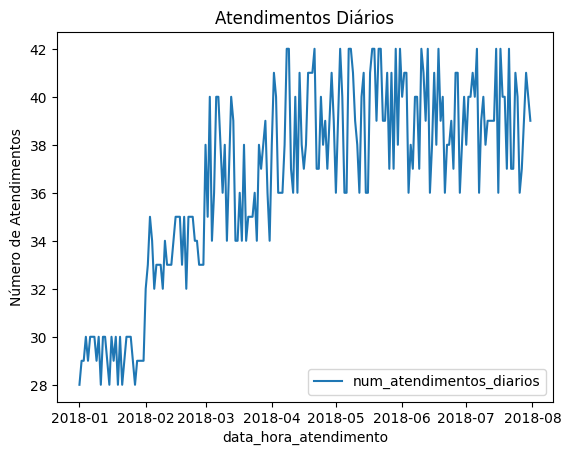

In [23]:
# Exibir as primeiras linhas do agrupamento diário
df_diario.head()

# Visualizar os atendimentos diários
df_diario.plot(x='data_hora_atendimento', y='num_atendimentos_diarios', title='Atendimentos Diários', ylabel='Número de Atendimentos')


In [24]:
df_diario.head()

,data_hora_atendimento,num_atendimentos_diarios
0,2018-01-01,28
1,2018-01-02,29
2,2018-01-03,29
3,2018-01-04,30
4,2018-01-05,29


In [25]:
df_diario['data_hora_atendimento'] = pd.to_datetime(df_diario['data_hora_atendimento'])

# Criar uma nova coluna 'dia_atendimento' contendo apenas a data no formato 'ano/mês/dia'
df_diario['dia_atendimento'] = df_diario['data_hora_atendimento'].dt.strftime('%d/%m/%Y')

# Ordenar o DataFrame pela nova coluna 'dia_atendimento'
df_diario = df_diario.sort_values(by='dia_atendimento')

# Exibir o DataFrame atualizado
print(df_diario)

    data_hora_atendimento  num_atendimentos_diarios dia_atendimento
0              2018-01-01                        28      01/01/2018
31             2018-02-01                        32      01/02/2018
59             2018-03-01                        38      01/03/2018
90             2018-04-01                        38      01/04/2018
120            2018-05-01                        36      01/05/2018
..                    ...                       ...             ...
210            2018-07-30                        40      30/07/2018
30             2018-01-31                        29      31/01/2018
89             2018-03-31                        34      31/03/2018
150            2018-05-31                        42      31/05/2018
211            2018-07-31                        39      31/07/2018

[212 rows x 3 columns]


In [26]:
# Exibir os primeiros registros do DataFrame com data sem as horas e sem barras
df_diario['data_hora_atendimento'] = pd.to_datetime(df_diario['data_hora_atendimento'])

df_diario['dia_atend'] = df_diario['data_hora_atendimento'].dt.date
df_diario = df_diario.sort_values(by='dia_atend')


In [27]:
df_diario

,data_hora_atendimento,num_atendimentos_diarios,dia_atendimento,dia_atend
0,2018-01-01,28,01/01/2018,2018-01-01
1,2018-01-02,29,02/01/2018,2018-01-02
2,2018-01-03,29,03/01/2018,2018-01-03
3,2018-01-04,30,04/01/2018,2018-01-04
4,2018-01-05,29,05/01/2018,2018-01-05
...,...,...,...,...
207,2018-07-27,37,27/07/2018,2018-07-27
208,2018-07-28,39,28/07/2018,2018-07-28
209,2018-07-29,41,29/07/2018,2018-07-29
210,2018-07-30,40,30/07/2018,2018-07-30


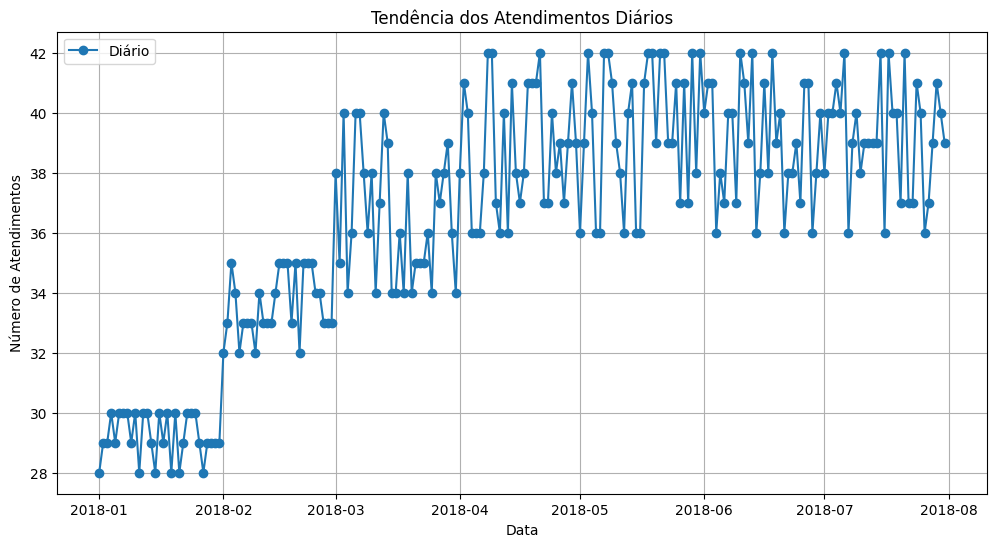

In [28]:
import matplotlib.pyplot as plt

# Gráfico de tendência dos atendimentos diários
plt.figure(figsize=(12, 6))
plt.plot(df_diario['data_hora_atendimento'], df_diario['num_atendimentos_diarios'], marker='o', linestyle='-', label='Diário')
plt.title('Tendência dos Atendimentos Diários')
plt.xlabel('Data')
plt.ylabel('Número de Atendimentos')
plt.legend()
plt.grid(True)
plt.show()


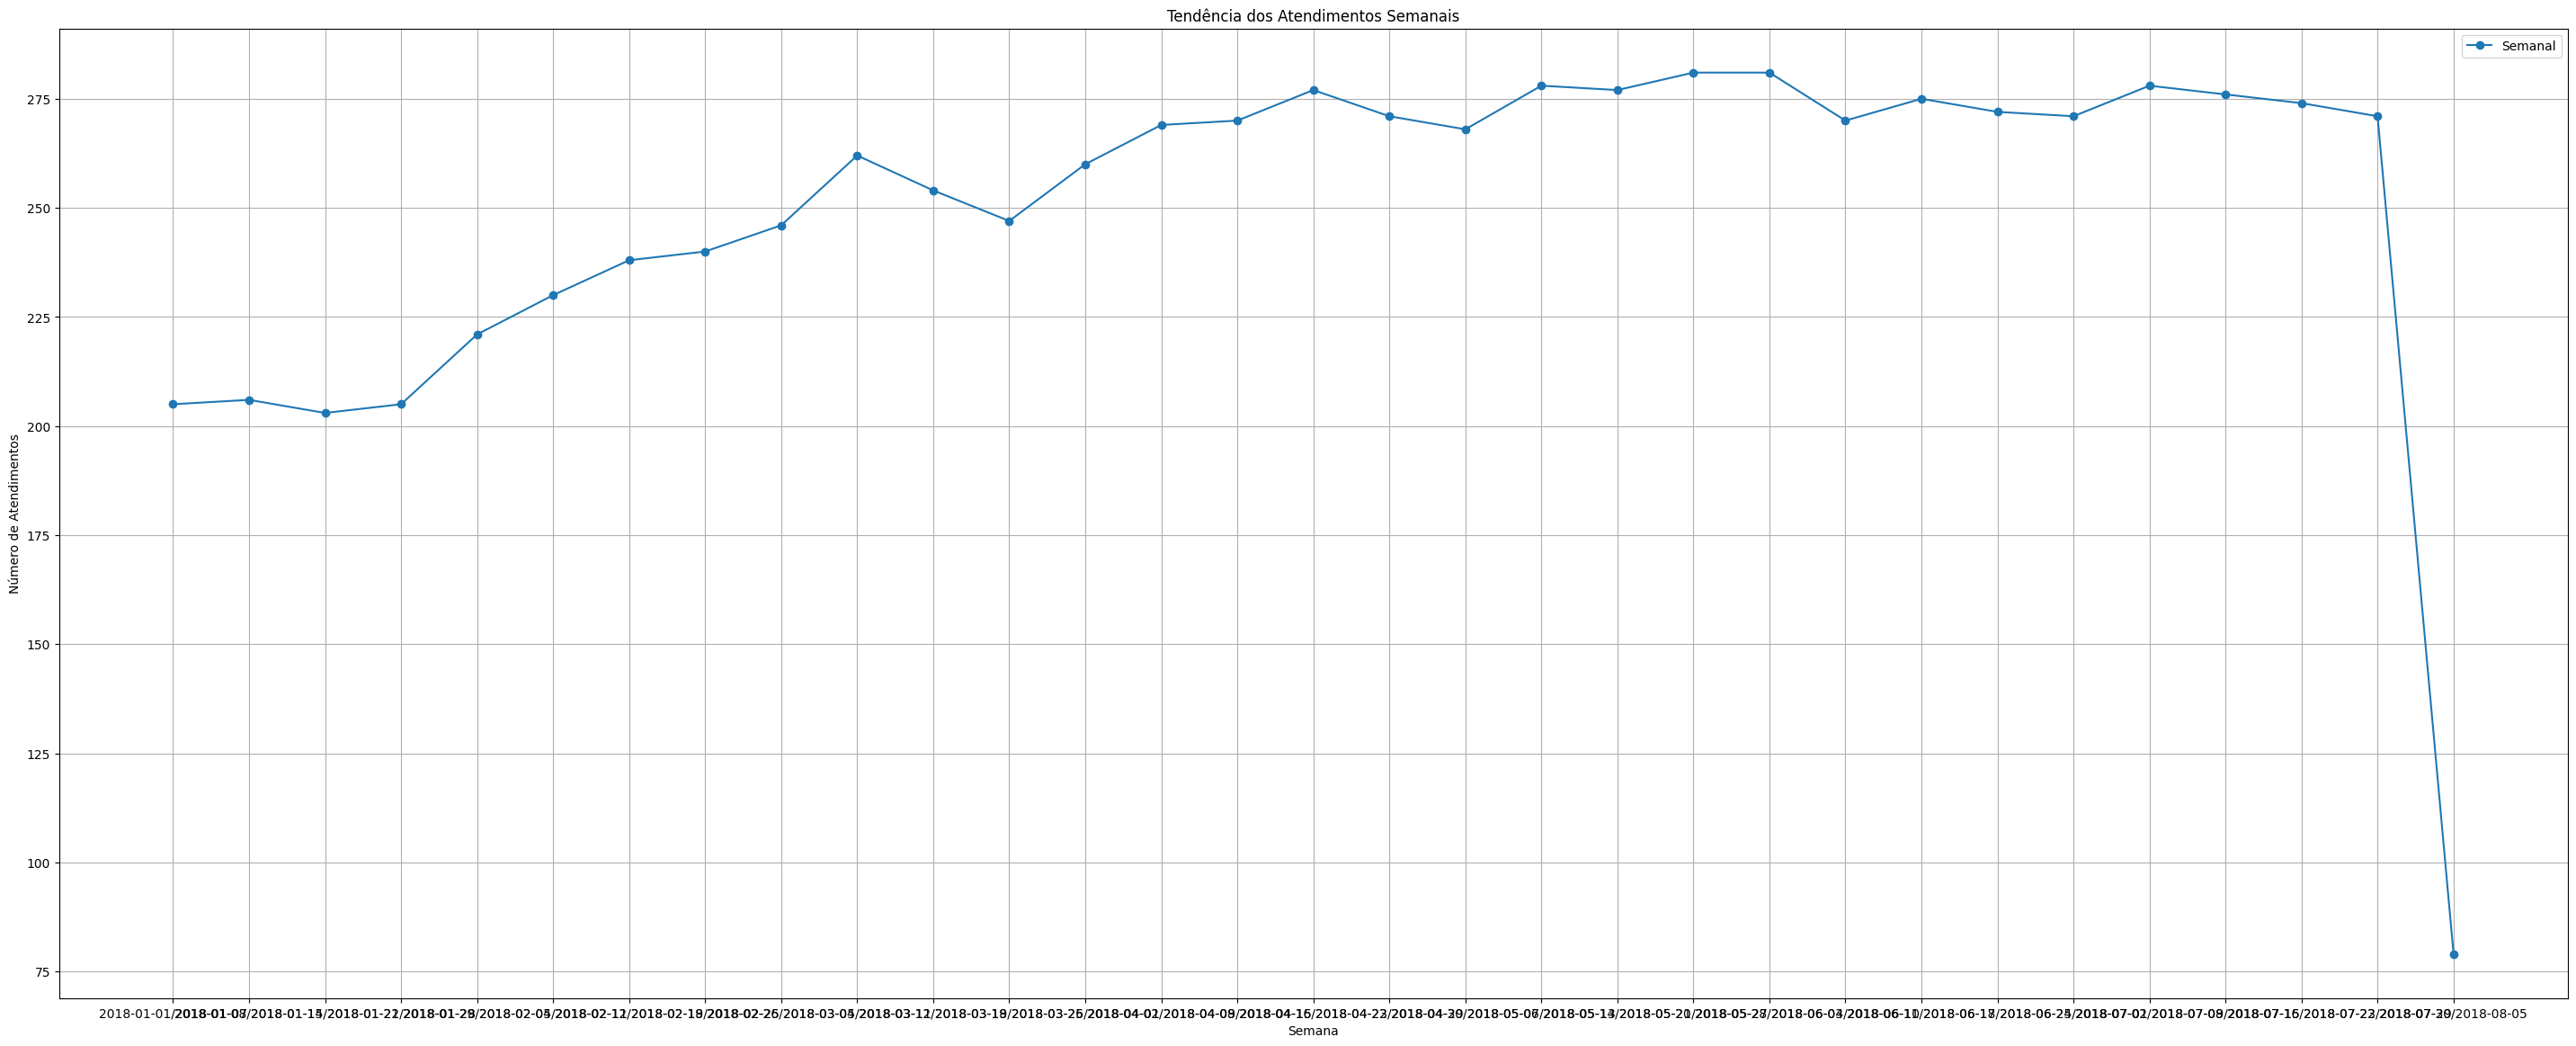

In [29]:

# Gráfico de tendência dos atendimentos semanais
plt.figure(figsize=(36, 14))
plt.plot(df_semanal['data_hora_atendimento'].astype(str), df_semanal['num_atendimentos_semanal'], marker='o', linestyle='-', label='Semanal')
plt.title('Tendência dos Atendimentos Semanais')
plt.xlabel('Semana')
plt.ylabel('Número de Atendimentos')
plt.legend()
plt.grid(True)
plt.show()


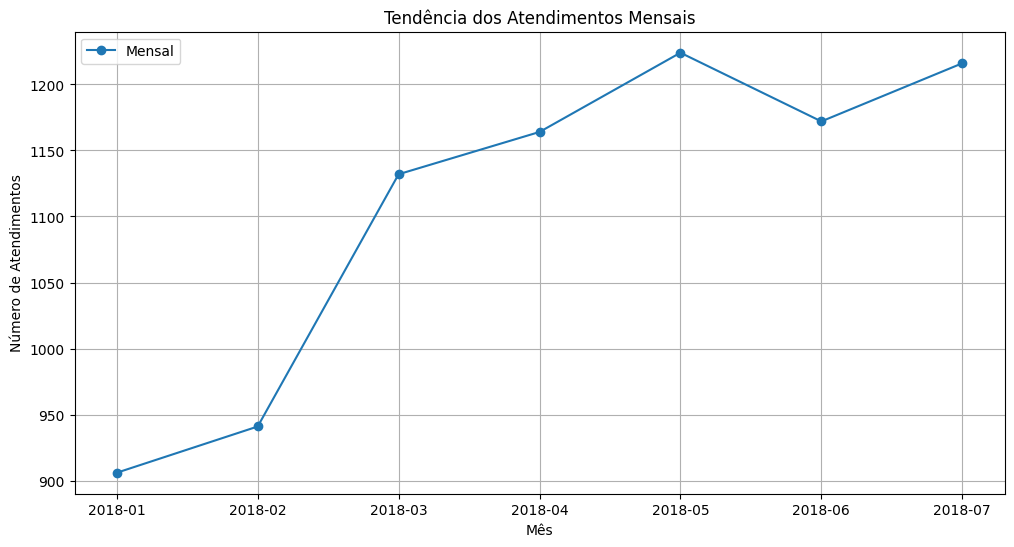

In [30]:

# Gráfico de tendência dos atendimentos mensais
plt.figure(figsize=(12, 6))
plt.plot(df_mensal['data_hora_atendimento'].astype(str), df_mensal['num_atendimentos_mensal'], marker='o', linestyle='-', label='Mensal')
plt.title('Tendência dos Atendimentos Mensais')
plt.xlabel('Mês')
plt.ylabel('Número de Atendimentos')
plt.legend()
plt.grid(True)
plt.show()

## DESAFIO: 

#### depois do dia 02/10/2024 vou modificar a base para diminuir a variacao
#### Tentar prever a demanda por bairro do paciente.

1. Juntar as tabelas: Precisamos unir os dados de atendimentos com os dados da tabela de pacientes, pois o bairro está armazenado nela.
2. Agrupar os atendimentos por bairro: Uma vez que os dados estejam unidos, podemos agrupar os atendimentos por bairro.
3. Preparar os dados para prever a demanda por bairro.
4. Lembrem de ordenar os dados de acordo com a coluna de tempo para realizar precisoes temporais.

In [31]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# Carregar variáveis do arquivo .env
load_dotenv()

# Função para conectar ao banco de dados usando SQLAlchemy
def connect_db_sqlalchemy():
    try:
        # Pegar as credenciais do arquivo .env
        db_host = os.getenv('DB_HOST')
        db_database = os.getenv('DB_DATABASE')
        db_user = os.getenv('DB_USER')
        db_password = os.getenv('DB_PASSWORD')
        db_port = os.getenv('DB_PORT')

        # Criar a URL de conexão no formato aceito pelo SQLAlchemy
        db_url = f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_database}'
        
        # Criar o engine de conexão usando SQLAlchemy
        engine = create_engine(db_url)
        print("Conexão com o banco de dados estabelecida com sucesso via SQLAlchemy!")
        return engine
    except Exception as e:
        print(f"Erro ao conectar ao banco de dados com SQLAlchemy: {e}")
        return None

# Função para trazer os dados de uma tabela e convertê-los em DataFrame
def tabela_para_dataframe(tabela, engine):
    query = f"SELECT * FROM {tabela}"
    return pd.read_sql(query, engine)

# Conectar ao banco de dados
engine = connect_db_sqlalchemy()

if engine:
    # Trazer os dados das tabelas atendimento e paciente
    df_atendimentos = tabela_para_dataframe('atendimento', engine)
    df_paciente = tabela_para_dataframe('paciente', engine)

    # Juntar as tabelas atendimento e paciente
    df_atendimento_geral = df_atendimentos.merge(df_paciente[['id', 'bairro', 'sexo']], left_on='id_paciente', right_on='id', suffixes=('', '_paciente'))

    # Exibir o DataFrame resultante
    print(df_atendimento_geral.head())
else:
    print("Erro na conexão com o banco de dados via SQLAlchemy.")

Conexão com o banco de dados estabelecida com sucesso via SQLAlchemy!
                                     id                            id_unidade  \
0  c5d201cf-21d9-41c9-b4e8-98a21eb97633  d817a1ff-2523-4691-b895-d64c9ad16ac3   
1  431e535b-781f-4d7e-8afc-4d682e53ac34  9e4e9182-8444-4bb8-8f6b-a54abacda450   
2  1d62be49-3056-4d91-ac3d-941af2529b32  3b3b0223-7607-46b7-a5c8-6f90d0092b15   
3  87e5c404-da0d-4fb9-9308-8032f36ebd70  9e4e9182-8444-4bb8-8f6b-a54abacda450   
4  28e0f805-5a3b-43e3-8780-db2d27b62d89  9e4e9182-8444-4bb8-8f6b-a54abacda450   

                  nome_unidade                           id_paciente  \
0    Unidade de Saúde Zona Sul  ff2e8729-7045-46c5-b192-4987010e26fc   
1  Unidade de Saúde Zona Norte  3e22ce3c-2ed8-4987-a3be-8a7c2dd458e7   
2     Unidade de Saúde Central  9f6d0949-7609-4318-92e0-f9f20c717261   
3  Unidade de Saúde Zona Norte  50ae0ca3-4162-4f5c-942d-3d8a77a4c0fb   
4  Unidade de Saúde Zona Norte  8484717f-c503-4533-ad38-ecdabc3120d6   

         n

In [32]:
df_atendimento_geral

,id,id_unidade,nome_unidade,id_paciente,nome_paciente,id_profissionalsaude,nome_profissionalsaude,cbo_profissional,data_hora_atendimento,cid,id_paciente,bairro,sexo
0,c5d201cf-21d9-41c9-b4e8-98a21eb97633,d817a1ff-2523-4691-b895-d64c9ad16ac3,Unidade de Saúde Zona Sul,ff2e8729-7045-46c5-b192-4987010e26fc,Ana Carolina Novais,d07510ef-36e9-44f1-bd1f-68b8dd7a2aa6,Dr. João Silva,2251-01,2018-02-01 08:51:00,A56,ff2e8729-7045-46c5-b192-4987010e26fc,Chines,M
1,431e535b-781f-4d7e-8afc-4d682e53ac34,9e4e9182-8444-4bb8-8f6b-a54abacda450,Unidade de Saúde Zona Norte,3e22ce3c-2ed8-4987-a3be-8a7c2dd458e7,Emanuel Cunha,798aa2a6-7007-4c16-8eb7-169c3aae81f5,Enf. Fernanda Alves,2235-01,2018-02-01 17:26:00,A54,3e22ce3c-2ed8-4987-a3be-8a7c2dd458e7,Do Sol,M
2,1d62be49-3056-4d91-ac3d-941af2529b32,3b3b0223-7607-46b7-a5c8-6f90d0092b15,Unidade de Saúde Central,9f6d0949-7609-4318-92e0-f9f20c717261,Kaique Duarte,6bb14e38-4e5b-4b18-b9bf-d070e836cc64,Dr. Carlos Nunes,2251-01,2018-02-01 12:50:00,A04,9f6d0949-7609-4318-92e0-f9f20c717261,Correia,F
3,87e5c404-da0d-4fb9-9308-8032f36ebd70,9e4e9182-8444-4bb8-8f6b-a54abacda450,Unidade de Saúde Zona Norte,50ae0ca3-4162-4f5c-942d-3d8a77a4c0fb,Lavínia Mendonça,e4d1ad76-ea68-4e6b-a740-bb64c802432f,Tec. José Costa,3222-01,2018-02-01 14:44:00,A37,50ae0ca3-4162-4f5c-942d-3d8a77a4c0fb,Monteiro,F
4,28e0f805-5a3b-43e3-8780-db2d27b62d89,9e4e9182-8444-4bb8-8f6b-a54abacda450,Unidade de Saúde Zona Norte,8484717f-c503-4533-ad38-ecdabc3120d6,Julia Albuquerque,f91b3179-4676-488a-9cd9-ed6d9e60c9df,Enf. Paulo Lima,2235-01,2018-02-01 09:48:00,A33,8484717f-c503-4533-ad38-ecdabc3120d6,Salgadinho,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7750,dfb7cc0b-fc7f-4f50-80a7-6ecf8b0bb155,3b3b0223-7607-46b7-a5c8-6f90d0092b15,Unidade de Saúde Central,22a65d4b-fbdc-4d51-964e-c0818915597a,Sr. Pedro Mendes,b52b9f7d-5b7e-497f-989c-133683f19954,Enf. Ana Pereira,2235-01,2018-07-31 13:45:00,A31,22a65d4b-fbdc-4d51-964e-c0818915597a,Ouro Velho,F
7751,be59a497-b912-4a47-b2c4-290e6ce4bb68,d817a1ff-2523-4691-b895-d64c9ad16ac3,Unidade de Saúde Zona Sul,37ec8c58-47a4-460d-8d3a-aeacc942886f,Rodrigo Albuquerque,34bb769a-02e1-43aa-87bb-204002b60f5d,Tec. Juliana Mota,3222-01,2018-07-31 15:59:00,A88,37ec8c58-47a4-460d-8d3a-aeacc942886f,Pedra,F
7752,9ae37d5b-6962-4179-91cb-5ef1facb5467,9e4e9182-8444-4bb8-8f6b-a54abacda450,Unidade de Saúde Zona Norte,d9b95ccc-aeea-4260-b745-d9eac8c286b4,Sra. Luísa Farias,ddaef559-55de-418b-b279-2943746fe39d,Tec. Amanda Rocha,3222-01,2018-07-31 15:53:00,A89,d9b95ccc-aeea-4260-b745-d9eac8c286b4,Liberdade,F
7753,2405ec21-d2df-48c2-a47a-646efe7ffb8c,d817a1ff-2523-4691-b895-d64c9ad16ac3,Unidade de Saúde Zona Sul,37f20f82-f4c8-4aa2-9209-4667999f9678,Melina Jesus,b52b9f7d-5b7e-497f-989c-133683f19954,Enf. Ana Pereira,2235-01,2018-07-31 11:21:00,A15,37f20f82-f4c8-4aa2-9209-4667999f9678,das Cidades,F


In [33]:
if engine:
    # Trazer os dados das tabelas atendimento e paciente
    df_atendimentos = tabela_para_dataframe('atendimento', engine)
    df_paciente = tabela_para_dataframe('paciente', engine)

    # Juntar as tabelas atendimento e paciente
    df_atendimento_geral = df_atendimentos.merge(df_paciente[['id', 'bairro', 'sexo']], left_on='id_paciente', right_on='id', suffixes=('', '_paciente'))

    # Converter a coluna data_hora_atendimento para datetime, se necessário
    df_atendimento_geral['data_hora_atendimento'] = pd.to_datetime(df_atendimento_geral['data_hora_atendimento'])

    # Agrupamento Diário
    df_diario = df_atendimento_geral.groupby([df_atendimento_geral['data_hora_atendimento'].dt.date, 'bairro', 'sexo']).size().reset_index(name='num_atendimentos_diarios')

    # Agrupamento Semanal
    df_semanal = df_atendimento_geral.groupby([df_atendimento_geral['data_hora_atendimento'].dt.to_period('W'), 'bairro', 'sexo']).size().reset_index(name='num_atendimentos_semanal')

    # Agrupamento Mensal
    df_mensal = df_atendimento_geral.groupby([df_atendimento_geral['data_hora_atendimento'].dt.to_period('M'), 'bairro', 'sexo']).size().reset_index(name='num_atendimentos_mensal')

    # Exibir os DataFrames resultantes
    print("Agrupamento Diário:")
    print(df_diario.head())
    print("\nAgrupamento Semanal:")
    print(df_semanal.head())
    print("\nAgrupamento Mensal:")
    print(df_mensal.head())
else:
    print("Erro na conexão com o banco de dados via SQLAlchemy.")

Agrupamento Diário:
  data_hora_atendimento  bairro sexo  num_atendimentos_diarios
0            2018-01-01  Barros    F                         1
1            2018-01-01  Catole    F                         2
2            2018-01-01  Centro    F                         1
3            2018-01-01  Centro    M                         1
4            2018-01-01  Chines    M                         1

Agrupamento Semanal:
   data_hora_atendimento   bairro sexo  num_atendimentos_semanal
0  2018-01-01/2018-01-07   Barros    F                         1
1  2018-01-01/2018-01-07  Cardoso    F                         3
2  2018-01-01/2018-01-07  Cardoso    M                        12
3  2018-01-01/2018-01-07   Catole    F                        11
4  2018-01-01/2018-01-07   Catole    M                         2

Agrupamento Mensal:
  data_hora_atendimento   bairro sexo  num_atendimentos_mensal
0               2018-01   Barros    F                        4
1               2018-01   Barros    M      

In [ ]:

    # Agrupamento Diário
df_diario = df_atendimento_geral.groupby([df_atendimento_geral['data_hora_atendimento'].dt.date, 'bairro', 'sexo']).size().reset_index(name='num_atendimentos_diarios')


In [ ]:

# Agrupamento Semanal
df_semanal = df_atendimento_geral.groupby([df_atendimento_geral['data_hora_atendimento'].dt.to_period('W'), 'bairro', 'sexo']).size().reset_index(name='num_atendimentos_semanal')


In [34]:

# Agrupamento Mensal
df_mensal = df_atendimento_geral.groupby([df_atendimento_geral['data_hora_atendimento'].dt.to_period('M'), 'bairro', 'sexo']).size().reset_index(name='num_atendimentos_mensal')



In [35]:
df_mensal

,data_hora_atendimento,bairro,sexo,num_atendimentos_mensal
0,2018-01,Barros,F,4
1,2018-01,Barros,M,10
2,2018-01,Cardoso,F,25
3,2018-01,Cardoso,M,42
4,2018-01,Catole,F,50
...,...,...,...,...
313,2018-07,Prata,F,67
314,2018-07,Reino Verde,F,18
315,2018-07,Salgadinho,F,54
316,2018-07,Silveira,F,15


In [36]:
#Df_mensal sem o sexo
df_mensal = df_atendimento_geral.groupby([df_atendimento_geral['data_hora_atendimento'].dt.to_period('M'), 'bairro']).size().reset_index(name='num_atendimentos_mensal')

In [37]:
df_mensal

,data_hora_atendimento,bairro,num_atendimentos_mensal
0,2018-01,Barros,14
1,2018-01,Cardoso,67
2,2018-01,Catole,81
3,2018-01,Cavalcante,8
4,2018-01,Centro,58
...,...,...,...
170,2018-07,Prata,67
171,2018-07,Reino Verde,18
172,2018-07,Salgadinho,54
173,2018-07,Silveira,15


In [38]:
df_mensal.rename(columns={'data_hora_atendimento': 'mes_ano'}, inplace=True)

In [16]:
 # Exportar o DataFrame df_mensal para um arquivo CSV na pasta saida_temporal
output_path = os.path.join('saida', 'df_mensal.csv')
df_mensal.to_csv(output_path, index=False)

# ajuda de codigo

# Agrupamento Diário
df_diario = df_atendimento_geral.groupby([df_atendimento_geral['data_hora_atendimento'].dt.date, 'bairro', 'sexo']).size().reset_index(name='num_atendimentos_diarios')
df_diario.rename(columns={'data_hora_atendimento': 'dia_atendimento'}, inplace=True)
df_diario = df_diario.sort_values(by=['dia_atendimento', 'bairro'])

# Exportar o DataFrame df_diario para um arquivo CSV
df_diario.to_csv('df_diario.csv', index=False)

# Agrupamento Semanal
df_semanal = df_atendimento_geral.groupby([df_atendimento_geral['data_hora_atendimento'].dt.to_period('W'), 'bairro', 'sexo']).size().reset_index(name='num_atendimentos_semanal')
df_semanal.rename(columns={'data_hora_atendimento': 'semana_atendimento'}, inplace=True)
df_semanal = df_semanal.sort_values(by=['semana_atendimento', 'bairro'])

# Exportar o DataFrame df_semanal para um arquivo CSV
df_semanal.to_csv('df_semanal.csv', index=False)

# Agrupamento Mensal (sem o campo sexo)
df_mensal = df_atendimento_geral.groupby([df_atendimento_geral['data_hora_atendimento'].dt.to_period('M'), 'bairro']).size().reset_index(name='num_atendimentos_mensal')
df_mensal.rename(columns={'data_hora_atendimento': 'mes_ano'}, inplace=True)
df_mensal = df_mensal.sort_values(by=['mes_ano', 'bairro'])

# Exportar o DataFrame df_mensal para um arquivo CSV
df_mensal.to_csv('df_mensal.csv', index=False)